In [ ]:

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

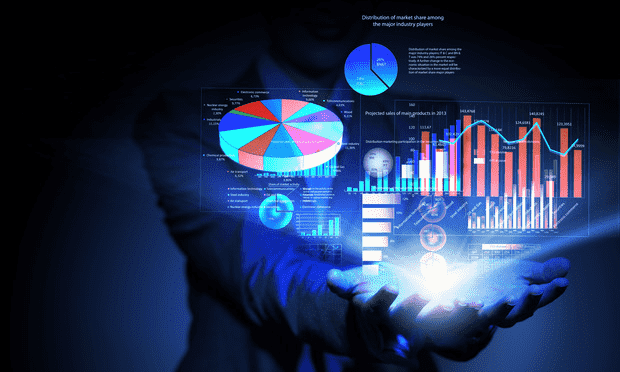

<div class="alert alert-warning">  
<h2><strong>Why exploratory data analysis (EDA) ?</strong></h2>


<p><h4>Exploratory data analysis is an approach to analyze the data. It's where a data enthusiast would be able to get an idea of overall structure of a dataset by bird's eye view. Data science often consist of advanced statistical and machine learning techniques. However, often the power of exploratory data analysis (EDA) is underestimated. In statistics, exploratory data analysis is an approach to analyzing dataset to summarize their main characteristics, often with visual methods. EDA is capable of telling us what kind of statistical techniques or modelling can be applied for the data.

EDA also plays a important role in feature engineering part as well. Having a good idea about the features in the data set, we will be able to create more significant features.
    </h4> </p>
    
</div>


<div class="alert alert-warning">  
<h2><strong>Main purpose of EDA</strong></h2>
  
* ****Check the missing values in data or any irrelevant characters****
* **Detect the Anomalies/Outliers in data**
* **Incorrect Headers of features**
* **Understand each and every data point by various analysis techniques**
* **Analyze the relationship between the variables**
    

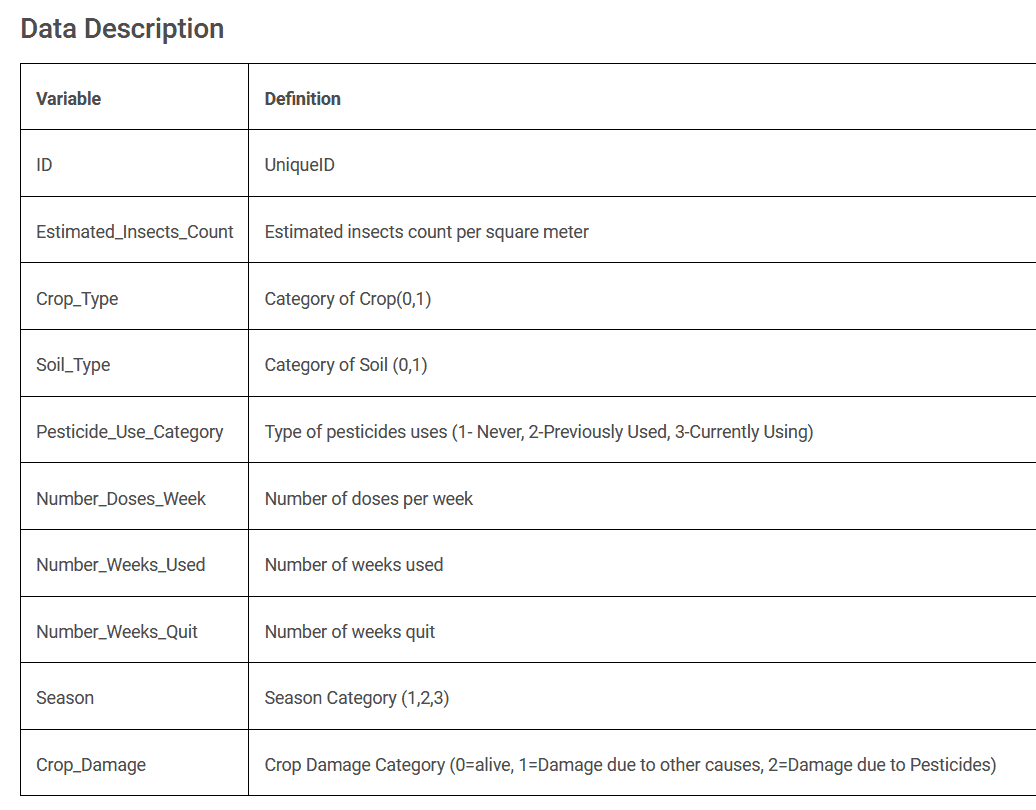

<div class="list-group" id="list-tab" role="tablist">
  <h3 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">Notebook Content!</h3>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#libraries" role="tab" aria-controls="profile">Import Libraries<span class="badge badge-primary badge-pill">1</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#load" role="tab" aria-controls="messages">Load Data<span class="badge badge-primary badge-pill">2</span></a>
  <a class="list-group-item list-group-item-action"  data-toggle="list" href="#visual" role="tab" aria-controls="settings">Missing value treatment<span class="badge badge-primary badge-pill">3</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#word" role="tab" aria-controls="settings">Summary of data<span class="badge badge-primary badge-pill">4</span></a> 
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#clean" role="tab" aria-controls="settings">Filtering data<span class="badge badge-primary badge-pill">5</span></a>
    <a class="list-group-item list-group-item-action" data-toggle="list" href="#split" role="tab" aria-controls="settings">Graphical analysis<span 
                                                                                                                                                   class="badge badge-primary badge-pill">6</span></a>

<div class="alert alert-danger">
<h2><strong>Library Imports</strong></h2>
</div>

In [ ]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

<div class="alert alert-danger">
<h2><strong>View at the dataset</strong></h2>
</div>

In [ ]:
data = pd.read_csv("../input/av-janatahack-machine-learning-in-agriculture/train_yaOffsB.csv")
data.shape 

In [ ]:
data.head(3).append(data.tail(3))


In [ ]:
data['ID'].nunique() 


<div class="alert alert-danger">
<h2><strong>Missing values</strong></h2>
</div>

In [ ]:
import missingno as msno
print(data.isnull().sum())

p = msno.bar(data, figsize = (9,6))

In [ ]:
data.info()


In [ ]:
data['Number_Weeks_Used'].fillna(method = 'ffill', inplace = True)
data['Number_Weeks_Used'] = data['Number_Weeks_Used'].astype('int64')



*Here i have used forward fill to impute the missing values just for simplicity, you could use any of the methods such as mean, median , mode etc..or just drop the missing values.*

<div class="alert alert-danger">
<h2><strong>Summary of data</strong></h2>
</div>

In [ ]:
col = data.columns.tolist()
col.remove('ID')
data[col].describe(percentiles = [.25,.5,.75,.95,.97,.99])  

<h3 style="border:2px solid Tomato;"> Pandas describe() function provides the statistical summary about the data such as mean, max, min, standard deviation, count along with this we can also pass the percentiles where we will be able to get the idea about the outliers in the data.</h3>



<div class="alert alert-danger">
<h2><strong>Filtering the data</strong></h2>
</div>

In [ ]:
data[(data['Season'] == 1) & (data['Crop_Damage'] == 1) & (data['Soil_Type'] == 0)].head() 


In [ ]:
pd.DataFrame(data.groupby(['Crop_Damage','Crop_Type'])['Pesticide_Use_Category'].count())


In [ ]:
pd.DataFrame(data.groupby(['Crop_Damage','Season','Crop_Type'])['Estimated_Insects_Count'].count())


In [ ]:

df = pd.DataFrame( data[data['Crop_Damage'] == 1 ].mean(), columns = ['Values'])
df[ 'Variance'] = pd.DataFrame( data[data['Crop_Damage'] == 1 ].var())
df[ 'Standard deviation'] = pd.DataFrame( data[data['Crop_Damage'] == 1 ].std())
df[ 'Median'] = pd.DataFrame( data[data['Crop_Damage'] == 1 ].median())
df

<div class="alert alert-danger">
<h2><strong>Graphical analysis</strong></h2>
</div>

In [ ]:
plt.subplot(1,2,1)
sns.countplot(x = 'Crop_Damage' , palette= 'cool', data= data) 
plt.title("Count plot of Crop damage (target variable)")

plt.subplot(1,2,2)
count = data['Crop_Damage'].value_counts()
count.plot.pie(autopct = '%1.1f%%',colors=['green','orange','blue'], figsize = (10,7),explode = [0,0.1,0.1],title = "Pie chart of Percentage of Crop_Damage")



<h3 style="border:2px solid Tomato;">By the count plot and pie chart we can infer that crop alive category has larger data points as compared to the other two categories. Since this is a multi-class classification problem, this is a clear case of multi-class imbalance problem.</h3>

In [ ]:
plt.figure(figsize = (10,6))
plt.subplot(1,2,1)
sns.countplot(x = 'Crop_Type' , palette= 'cool', data= data) 
plt.title("Count plot of Crop_Type")

plt.subplot(1,2,2)
sns.countplot(data['Crop_Type'], hue = data['Crop_Damage'],palette="rocket_r")
plt.title("Plot of crop damage Vs Crop type")

**Inference**

* Crop type 0 has larger data points as compared to the crop type 1

* More than 50000 of the crops of crop type 0 and 20000 of crops of crop type 1 are alive

* There is more damage to crop 0 due to pesticides

In [ ]:
data[col].hist(figsize=(10,15),color = 'green')


In [ ]:
sns.distplot(data['Estimated_Insects_Count'], kde = True, hist = True, bins= 30)
plt.title("Density plot of Estimated_Insects_Count")

In [ ]:

plt.figure(figsize = (15,5))
sns.countplot(data['Number_Weeks_Used'], palette = 'hsv')
plt.title('Count of Number_Weeks_Used')
plt.show() 
sns.countplot(data['Number_Doses_Week'], palette = 'hsv')
plt.title('Count of Number_Doses_Week')
plt.show() 

In [ ]:

sns.countplot(data['Pesticide_Use_Category'], palette = 'dark')
plt.title("Count plot of Pesticide_Use_Category")
plt.show()
sns.catplot(x = 'Pesticide_Use_Category', y = 'Estimated_Insects_Count', kind = 'box', data = data, hue = 'Crop_Damage', palette= 'rocket_r')
plt.title("Box plot of Pesticide_Use_Category")


In [ ]:

plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.countplot(data['Season'], palette = 'hsv')
plt.title('Count plot of Season')
plt.subplot(1,2,2)
sns.countplot(data['Season'], hue = data['Crop_Damage'], palette = 'hsv')
plt.title('Count plot of Crop_Damage in Seasons')
plt.show() 

In [ ]:
import plotly.express as px

fig = px.sunburst(data, path=[ 'Season','Crop_Type'], title="Crop type in various seasons")

fig.show()

In [ ]:

sns.countplot(data['Season'], hue = data['Crop_Type'])
plt.title('Count plot of Crop_type in Seasons')


<h3 style="background-color:LightGreen; color:red" >These are some of the basic analysis that are performed on the data at the first phase, added to this we can also perform correlation analysis as well. In our case we have most of the variables are multilevel categorical variables.We cannot perform Pearson's correlation, this can be carried out by the statistical test such as ANOVA.</h3>

<h2 style="background-color:LightRed; color:blue">Hope you find this article helpful. Please upvote ! </h2>